## Classes for Pikachu and Pichu

In [37]:
from numbers import Number

class Pikachu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pikachu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
            
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width

class Pichu:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
        
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    
class Entity:
    def __init__(self, width: float, height: float):
        self._width = width
        self._height = height
    
    def add_pichu(self, height:float , width:float):
        if not isinstance(height, Number) and not isinstance(width, Number):
            raise(f"Height and width must be a number, not '{type(height, width)}'")
    
    @property
    def height(self):
        return self._height
    
    @property
    def width(self):
        return self._width
    

## Fetching file and cleaning the data

In [38]:
#Pikachu
stats_path = "../data/pikachu.txt"                      #fetching file Data for Pikachu

with open(stats_path, "r") as file:
    raw_pikachu = file.read()                       

pikachu_stats = raw_pikachu.split("\n")                 #Splitting string by every row and making list
pikachu_stats = pikachu_stats[1:]                       #Taking away the first row (description) from list

if pikachu_stats[-1] == "":                             #can be good incase the last row is empty, which it was
    pikachu_stats.pop()                                 #deletes last row if it is empty, help from GPT

pikachu_tuple = [eval(item) for item in pikachu_stats]  #using eval to take every object/row and transforming it to tuple (cordinates)
                                                        #Eval tip from teacher, further information about eval from GPT
pikachu_width, pikachu_height = zip(*pikachu_tuple)     #opening up tuple and transfering it over to a x, y variable


#Pichu
stats_path = "../data/pichu.txt"                        #doing the same for Pichu

with open(stats_path, "r") as file:
    raw_pichu = file.read()

pichu_stats = raw_pichu.split("\n")
pichu_stats = pichu_stats[1:]

if pichu_stats[-1] == "":
    pichu_stats.pop()

pichu_tuple = [eval(item) for item in pichu_stats]
pichu_width, pichu_height = zip(*pichu_tuple)


#test punkter
stats_path = "../Data/test_points.txt"
with open(stats_path, "r") as file:
    testpunkter_raw = file.read()

testpunkter = testpunkter_raw.replace(", ", ",")            #tar bort oregelbunda mellanrum
testpunkter = testpunkter.replace("),(", "), (")            #Makes space inbetween every cordinate
test_list = testpunkter.split(",")                          #Making list splitting every ", "


test_tuple = [eval(item) for item in test_list]             #tuple
test_width, test_height = zip(*test_tuple)                  
print(test_list)
print(test_width, test_height)

SyntaxError: '(' was never closed (<string>, line 1)

## Plotting Pikachu, pichu and test

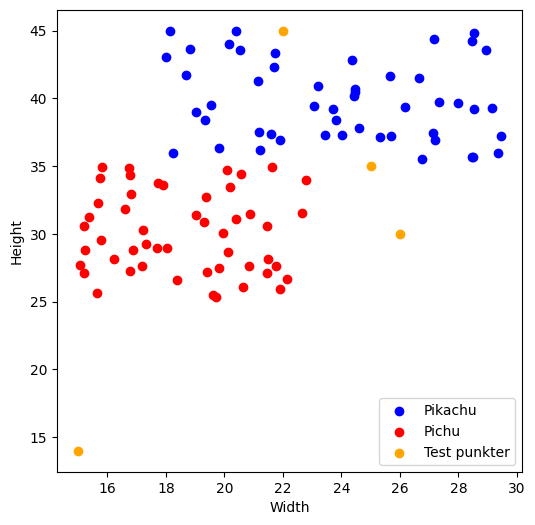

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.scatter(test_width, test_height, color = "orange", label = "Test punkter")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")

## Pikachu and Pichu mean dimensions

In [ ]:
"""Ide to calculate which one is closer from GPT"""

##Pikachu
width_sum_pikachu = 0
height_sum_pikachu = 0
i = 0

for width, height in pikachu_tuple:                 #Sum of dimensions
    width_sum_pikachu += width             
    height_sum_pikachu += height
    i += 1
    
width_mean_pikachu = width_sum_pikachu / i          #Mean calculation for pikachu
height_mean_pikachu = height_sum_pikachu / i

##Pichu
width_sum_pichu = 0
height_sum_pichu = 0
i = 0

for width, height in pichu_tuple:
    width_sum_pichu += width
    height_sum_pichu += height
    i += 1
    
width_mean_pichu = width_sum_pichu / i
height_mean_pichu = height_sum_pichu / i


print(f"Pikachu mean width: {width_mean_pikachu}\nPikachu mean height: {height_mean_pikachu}")
print(f"Pichu mean width: {width_mean_pichu}\nPichu mean height: {height_mean_pichu}")

Pikachu mean width: 23.945665818409296
Pikachu mean height: 39.82285079667779
Pichu mean width: 18.60547397404892
Pichu mean height: 30.084542394967194


## Adding unidentified

In [ ]:
import numpy as np

unidentified_width, unidentified_height = (24, 37)

#Formula to count distance from GPT even though i did it it exercises...
unidentified_distance_pikachu = np.sqrt((width_mean_pikachu - unidentified_width)**2 + (height_mean_pikachu - unidentified_height)**2) 
unidentified_distance_pichu = np.sqrt((width_mean_pichu - unidentified_width)**2 + (height_mean_pichu - unidentified_height)**2)

if unidentified_distance_pikachu < unidentified_distance_pichu:             #If Pikachu distance is smaler then Pichu's
    print(f"You most likly found a Pikachu!")

elif unidentified_distance_pichu < unidentified_distance_pikachu:           #If Pichu distance is smaler then Pikachu's
    print(f"You most likly found a Pichu!")

else:
    print(F"I am unshore if you found a Pikachu or Pichu...")               #If the distance are the same

You most likly found a Pikachu!


## User interface

In [ ]:
#unidentified_width = float(input("Enter width of entity: "))
#unidentified_height = float(input("Enter height of entity: "))

entity = Entity(float(input("Enter width of entity: ")), float(input("Enter height of entity: ")))          #Making object from entity class

entity_distance_pikachu = np.sqrt((width_mean_pikachu - entity.width)**2 + (height_mean_pikachu - entity.height)**2) 
entity_distance_pichu = np.sqrt((width_mean_pichu - entity.width)**2 + (height_mean_pichu - entity.height)**2)

if entity_distance_pikachu < entity_distance_pichu:                          #If Pikachu distance is smaler then Pichu's
    print(f"You most likly found a Pikachu!")              ##Vill lägga till alla i lista i riktiga programmet
    pikachu = Pikachu(entity._width, entity._height)

elif entity_distance_pichu < entity_distance_pikachu:                       #If Pichu distance is smaler then Pikachu's
    print(f"You most likly found a Pichu!")                ##Vill lägga till alla i lista i riktiga programmet
    pichu = Pichu(entity._width, entity._height)

else:
    print(F"I am unshore if you found a Pikachu or Pichu...")               #If the distance are the same



NameError: name 'Entity' is not defined

## Plotting entity find

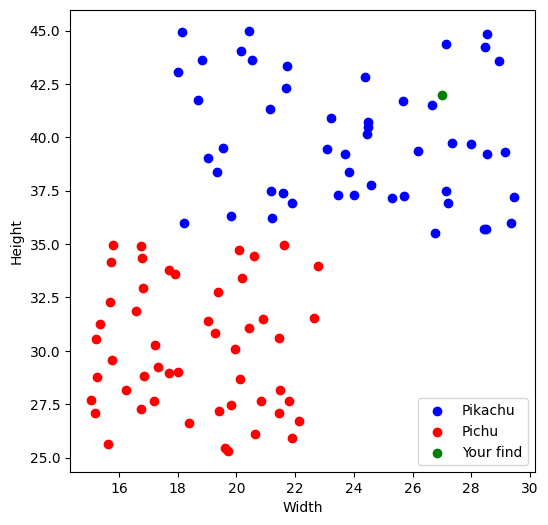

In [ ]:
import matplotlib.pyplot as plt
"""Help from exercises"""   ## kanske en en if(om det var pkachu eller pichu så går den över till rätt objekt)
                            ## En egen metod som jag slänger in i plotting metoden
plt.figure(figsize = (6, 6))
plt.scatter(pikachu_width, pikachu_height, color = "blue", label = "Pikachu")   #print for pinchu graf
plt.scatter(pichu_width, pichu_height, color = "red", label = "Pichu")          #print for pichu graf
plt.scatter(entity.width, entity.height, color = "green", label = "Your find")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(loc = "lower right")